Infinitary numpy. Can we make a generator that has numpy like properties
Can we reshape?
w, w + 1, w + 2... reshapes to 


nN + m for finite arrya
nw + m


Ordinals



In [ ]:
import numpy as np

class InfArray():
    def __init__(self):
        self.data = []


    def __get_item__(self):


def arange():
    N = 128
    while True:
        n += N
        yield np.arange(n, n+N)



What was so compelling about linear algebra?

PDEs and boundary value problems
Inverse problems
hierarchical matrices
random wlaks https://www.philipzucker.com/walk-on-spheres-method-in-julia/
monte carlo https://www.philipzucker.com/metropolis-sampling-of-quantum-hall-wavefunction/ the laughlin wavefunction is very high dimensional. Integrating it is hard
conformal ising
annihilation creation algebra https://www.philipzucker.com/quantum-harmonic-oscillator-algebra-in-sympy/ https://www.philipzucker.com/annihilation-creation-with-wick-contraction-in-python/
multipole
BEM

wave equation. holography
statistical optics

random media eigenvalues
 
WKB integral
chebfun
differentiation via integration

Green's functions as matrix inverses
Schur complement. Recursive solving block matrices, infinite boundary conditions, effective dynamics, model reduction, domain decomposition

multiscale method
FFT

circle packing via pytorch
strang book
Look at some of my oldest blog posts

cumulants
Hydrogen
exact quantum manybody. But compare it to what?
helium https://x.com/fluxtheorist/status/1772327384881971591?s=20 perterbutation theory etc.


jordan wigner string https://www.philipzucker.com/attaching-the-jordan-wigner-string-in-numpy/

stochastic processes. LQR estimators https://www.philipzucker.com/LQR/ https://www.philipzucker.com/cart-pole-using-lyapunov-lqr-control-openai-gym/

https://www.philipzucker.com/band-theory-mobius-strip/
https://www.philipzucker.com/band-structure/
density of states

https://www.philipzucker.com/topologically-non-trivial-circuit-making-haldane-model-gyrator/
https://www.philipzucker.com/hash-vectors-interacting-particles/

https://www.philipzucker.com/a-touch-of-topological-quantum-computation-in-haskell-pt-i/

https://www.philipzucker.com/solving-the-xy-model-using-mixed-integer-optimization-in-python/
https://www.philipzucker.com/the-classical-coulomb-gas-as-a-mixed-integer-quadratic-program/
https://www.philipzucker.com/annihilating-my-friend-will-with-a-python-fluid-simulation-like-the-cur-he-is/

https://www.philipzucker.com/grobner-bases-and-optics/
https://www.philipzucker.com/solving-the-laplace-equations-with-linear-relations/

retarded potential solving
MIP quantum control
SDP for bridges or something. What was that?

The following builds a finite difference approximate of the second derivative

[3.96157056+0.j 3.84775907+0.j 3.66293922+0.j 3.41421356+0.j
 3.11114047+0.j 2.76536686+0.j 2.39018064+0.j 2.        +0.j
 1.60981936+0.j 0.03842944+0.j 0.15224093+0.j 0.33706078+0.j
 0.58578644+0.j 1.23463314+0.j 0.88885953+0.j]


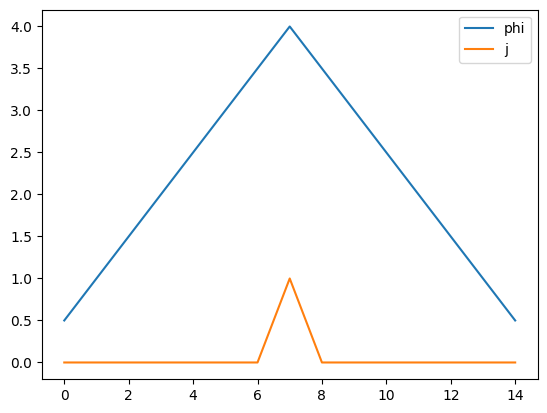

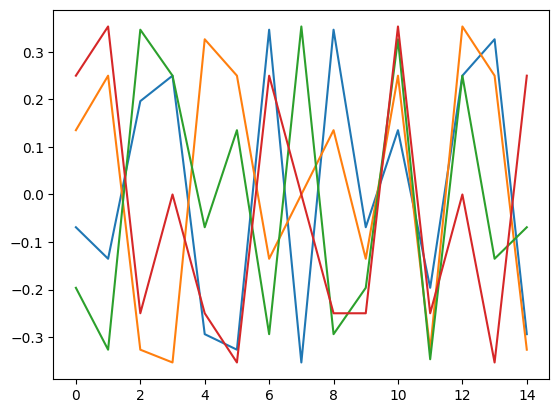

In [29]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
# Toeplitz K matrix -1 2 -1
N = 15
col = np.zeros(N)
col[0] = 2
col[1] = -1
K = scipy.linalg.toeplitz(col)

j = np.zeros(N)
j[N//2] = 1
phi = scipy.linalg.solve(K, j)
plt.plot(phi, label='phi')
plt.plot(j, label='j')
plt.legend()
plt.figure()

lams, eigvecs = scipy.linalg.eig(K)
for i in range(4):
    plt.plot(eigvecs[i,:])
print(lams) # hmm unordered


# Random Walk
Somehow, our estimate / approximator of the probablity distrubtion will be a function of the samples
p(x, {\hat{x}_i})
Just like quantum electrostatics, this is a function space
`<f[p]> = \int D[p] P[p] f[p] = \int dx1 dx2 dx3 P(x1,x2,x3,x4,...) f[p(x, {x_i})]`


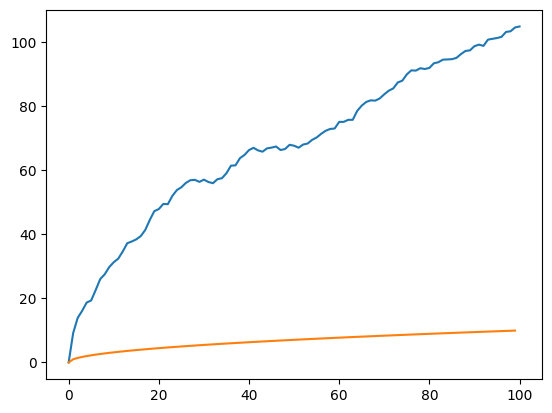

In [35]:

xs = []
N = 100
for j in range(100):
    x = 0
    trace = [x]
    for i in range(N):
        x += np.random.randn()
        trace.append(x)
    xs.append(trace)

#plt.plot(x)
plt.plot(np.sqrt(np.sum(np.array(xs)**2, axis=0)))
plt.plot(np.sqrt(np.arange(N)))



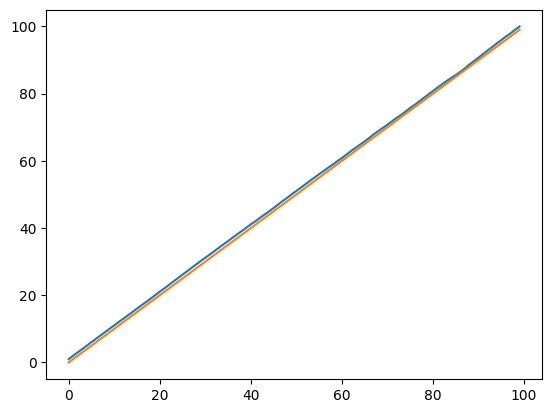

In [42]:
# random walk
nexp = 100000 # basically instant
nsteps = 100
steps = np.random.randn(nexp,nsteps)
x = np.cumsum(steps, axis=1)
plt.plot(np.mean(x**2, axis=0))
plt.plot(np.arange(nsteps))


In [5]:
# distribution of random walk
import scipy
import numpy as np
def p(x, nstep):
    return np.exp(-x**2/(2*nstep))/np.sqrt(2*np.pi*nstep)

scipy.integrate.quad(lambda x: p(x, 5), -10, 10) # 1
# how to bin my experiments?

# joint distribution
# making initial position a gaussian rather than delta is better behaved.
def p(x):
    dx = x[1:] - x[:-1] 
    return np.exp(-np.sum(dx**2)/2) * np.exp(-x[0]**2/2)

# numerically integrate out intermediates

def p(x0, dxs):
    return np.exp(-np.sum(dxs**2)/2) * np.exp(-x0**2/2)
# convert to distro over xi?


# bouncing balls and cumulant expansions. Mattuck?



(0.999992255783569, 1.4973882897506563e-10)

A fun perspective is that the approximator is a stoachstic function, a very high dimensional object. It inherits this because our function is determined by the values of the samples, which are random variables themselves.

A question: can we use automated reasoninig for abstract calculus and probablistic claculations. These rarely care about the form of a particular distribution.
axioms. 0 <= P() <= 1



In [53]:
# https://docs.sympy.org/latest/modules/stats.html
from sympy.stats import P, E, variance, Die, Normal
from sympy import simplify
nsteps = 10
Xs = [Normal(f'X{n}', 0, 1) for n in range(nsteps)]
#sum(E(X**2) for X in Xs)
#E(sum(Xs) ** 2) # pretty dang slow
sum(Xs)

X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9

In [13]:
from sympy.abc import *
import sympy

sympy.Eq(r, sympy.sqrt(x**2 + y**2 + z**2))
r = sympy.sqrt(x**2 + y**2 + z**2)
#sympy.diff(r, x)
def grad(f):
    return [sympy.diff(f, x) for x in [x,y,z]]
F = grad(1/r)



[-x/(x**2 + y**2 + z**2)**(3/2),
 -y/(x**2 + y**2 + z**2)**(3/2),
 -z/(x**2 + y**2 + z**2)**(3/2)]

Free space green's function is gonna be a pain
In a sphere is doable via inversion method.

